<a href="https://colab.research.google.com/github/abhishekkr8399/ML/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)
df=pd.read_csv("/content/drive/MyDrive/dataR2.csv")

In [ ]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

<Axes: xlabel='Insulin', ylabel='count'>

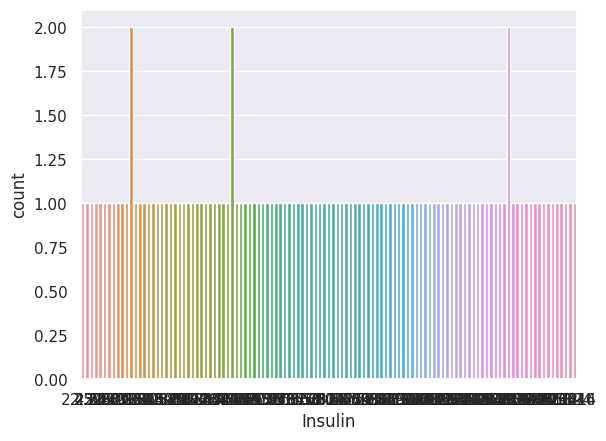

In [ ]:
sns.countplot(data=df,x="Insulin")

<Axes: xlabel='HOMA', ylabel='count'>

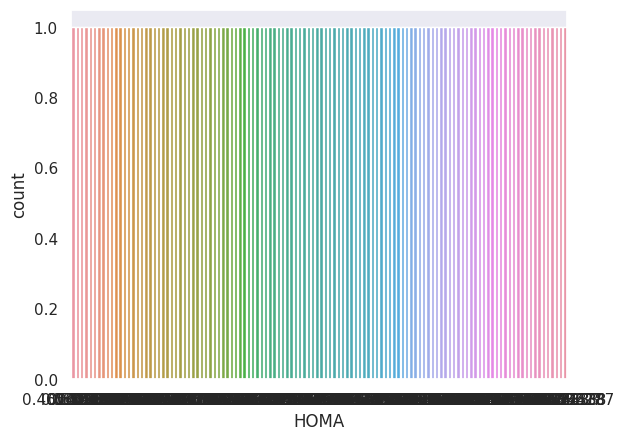

In [ ]:
sns.countplot(data=df,x="HOMA")

Classification
2    64
1    52
dtype: int64


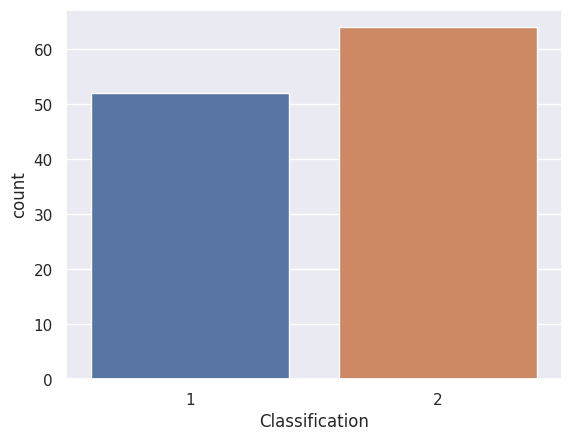

In [ ]:
sns.countplot(x=df["Classification"])
print(df.value_counts("Classification"))

Classification
1    64
2    64
dtype: int64


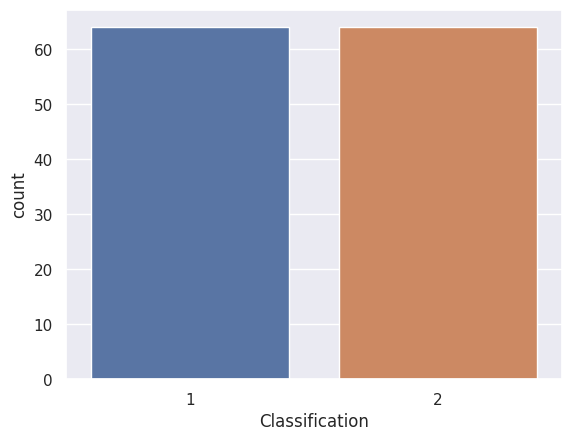

In [ ]:
from sklearn.utils import resample
#Creating two additional dataframes for each target value
df_majority = df[df["Classification"]==2]
df_minority = df[df["Classification"]==1]
#Oversamplification of minority class (SMOT)
df_minority_unsampled = resample(df_minority, n_samples=64, random_state=0)
df2 = pd.concat([df_minority_unsampled, df_majority])
sns.countplot(x=df2["Classification"])
print(df2.value_counts("Classification"))

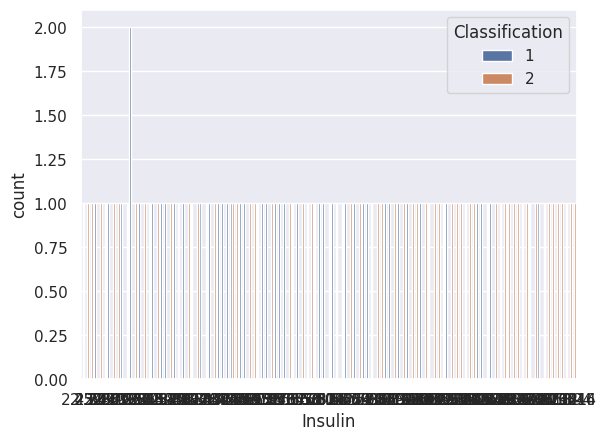

In [ ]:
sns.countplot(data=df, x="Insulin", hue="Classification");

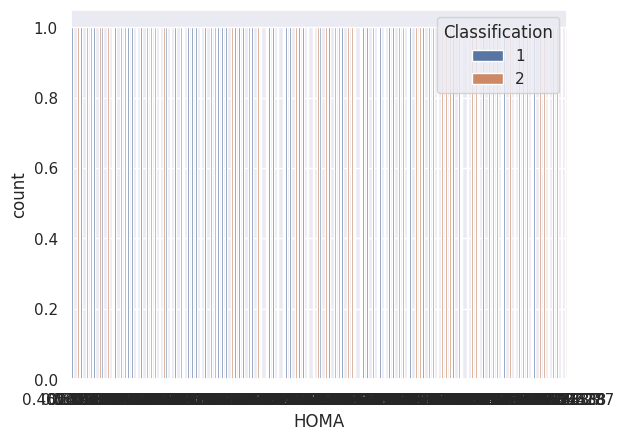

In [ ]:
sns.countplot(data=df, x="HOMA", hue="Classification");

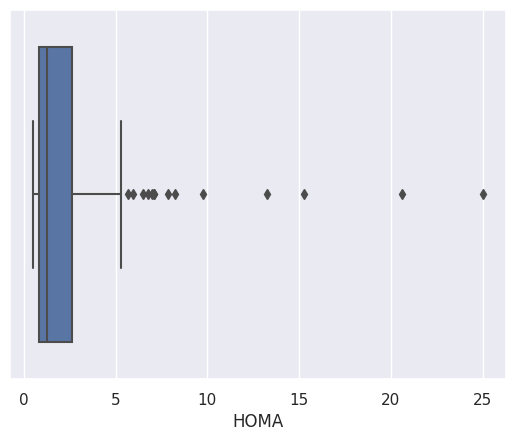

In [ ]:
sns.boxplot(x=df2["HOMA"]);

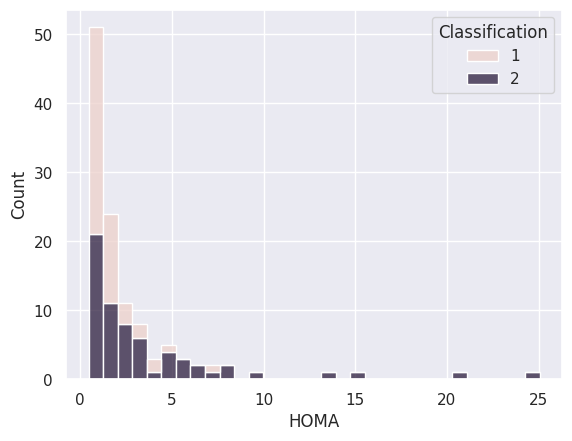

In [ ]:
sns.histplot(data=df, x="HOMA", hue="Classification", multiple="stack");

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
df3= df2[(z<3).all(axis = 1)]
df3.shape

(114, 10)

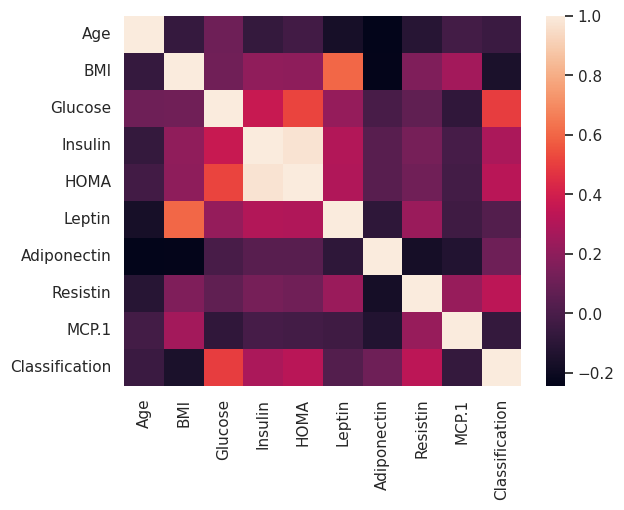

In [ ]:
dataplot = sns.heatmap(df3.corr(), annot=False)

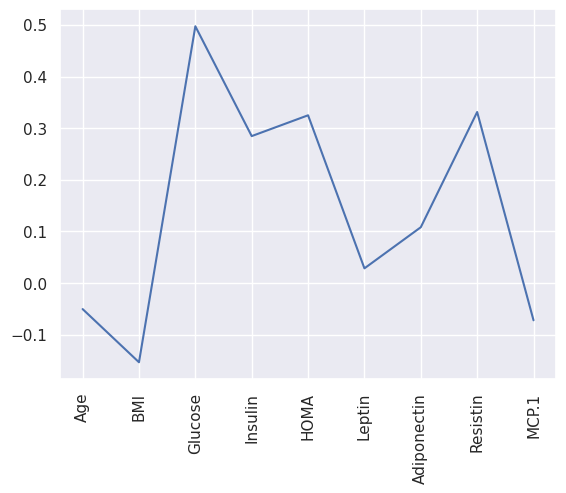

In [ ]:
var=df3[df3.columns].corr()['Classification'][:-1]
plt.plot(var)
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = df.drop("Classification",axis=1)
y = df["Classification"]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
print("Accuracy of Random Forest Classifier is",model2.score(X_test, y_test))

Accuracy of Random Forest Classifier is 0.7083333333333334


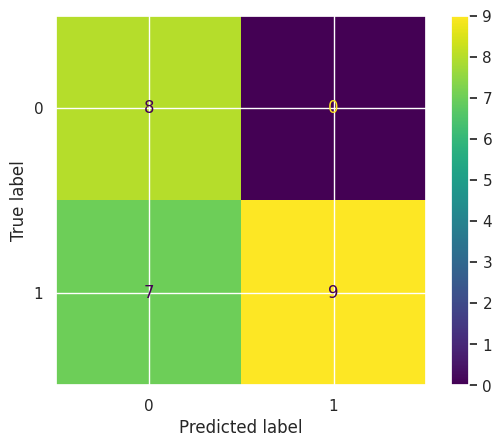

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_preds = model2.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();

In [ ]:
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)
model3.score(X_test, y_test)
print("Accuracy of Logistic Regression is",model3.score(X_test, y_test))

Accuracy of Logistic Regression is 0.7083333333333334


In [ ]:
model4 = KNeighborsClassifier(n_neighbors=2)
model4.fit(X_train, y_train)
model4.score(X_test, y_test)
print("Accuracy of K Nearest Neighbour is",model4.score(X_test, y_test))

Accuracy of K Nearest Neighbour is 0.5416666666666666


Accuracy of SVM is 0.6666666666666666


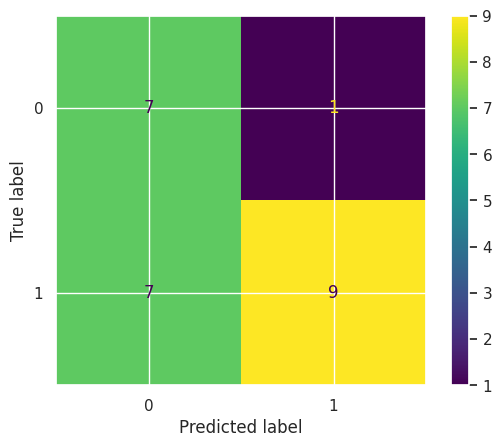

In [ ]:
model5 = SVC(kernel='linear') 
model5.fit(X_train, y_train) 
y_pred = model5.predict(X_test)

from sklearn import metrics
print("Accuracy of SVM is",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_preds = model5.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();

Accuracy of SVM is 0.6666666666666666


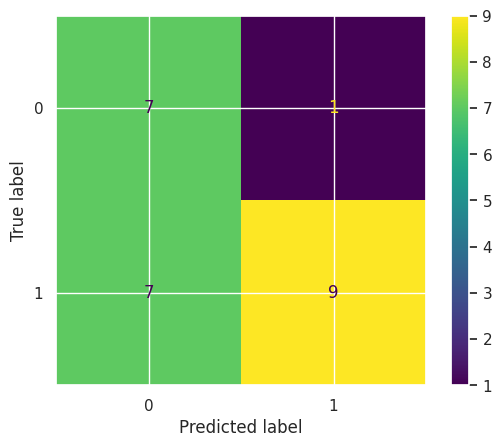

In [ ]:
model5 = SVC(kernel='linear') 
model5.fit(X_train, y_train) 
y_pred = model5.predict(X_test)

from sklearn import metrics
print("Accuracy of SVM is",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
y_preds = model5.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot();